In [26]:
# Importação das bibliotecas necessárias para análise e gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

# Estilo dos gráficos
sns.set(style="darkgrid")


In [27]:
# Leitura do dataset da pesquisa
df = pd.read_csv('survey_results_public.csv')

# Visualiza as primeiras 5 linhas da tabela
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [28]:
# Informações sobre as colunas e tipos de dados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [29]:
# Seleciona apenas as colunas relevantes para análise
colunas_interesse = ['Employment', 'Country', 'EdLevel', 'DevType',
                     'LanguageHaveWorkedWith', 'ConvertedCompYearly']

df_clean = df[colunas_interesse].dropna()  # Remove linhas com dados ausentes
df_clean.head()


,Employment,Country,EdLevel,DevType,LanguageHaveWorkedWith,ConvertedCompYearly
72,"Employed, full-time;Student, full-time;Indepen...",Pakistan,"Secondary school (e.g. American high school, G...",Data scientist or machine learning specialist,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,7322.0
374,"Employed, full-time",Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Academic researcher,C;C++;Fortran;MATLAB;Python;SQL,30074.0
379,"Employed, full-time",Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Data scientist or machine learning specialist,JavaScript;Julia;Python;SQL;TypeScript,91295.0
385,"Independent contractor, freelancer, or self-em...",France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end",Python,53703.0
389,"Employed, full-time;Student, part-time",United States of America,Some college/university study without earning ...,Student,HTML/CSS;JavaScript;Python;SQL;TypeScript,110000.0


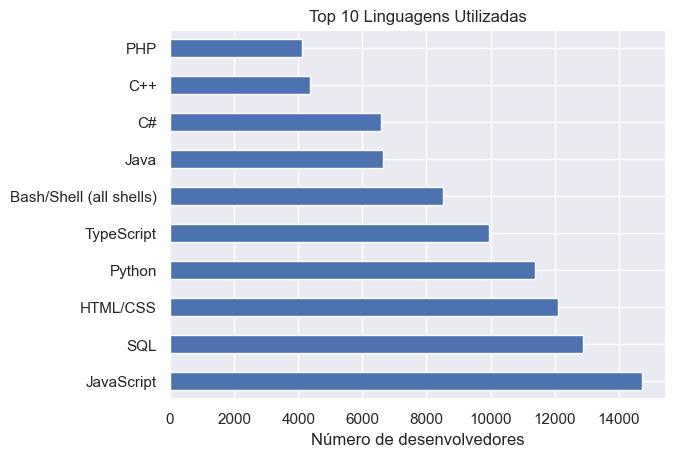

In [30]:
# Divide os valores das linguagens e conta frequência
langs = df_clean['LanguageHaveWorkedWith'].dropna().str.split(';')
flat_langs = [lang.strip() for sublist in langs for lang in sublist]
lang_counts = pd.Series(Counter(flat_langs)).sort_values(ascending=False)

# Plota o gráfico das 10 linguagens mais usadas
lang_counts.head(10).plot(kind='barh', title='Top 10 Linguagens Utilizadas')
plt.xlabel('Número de desenvolvedores')
plt.show()


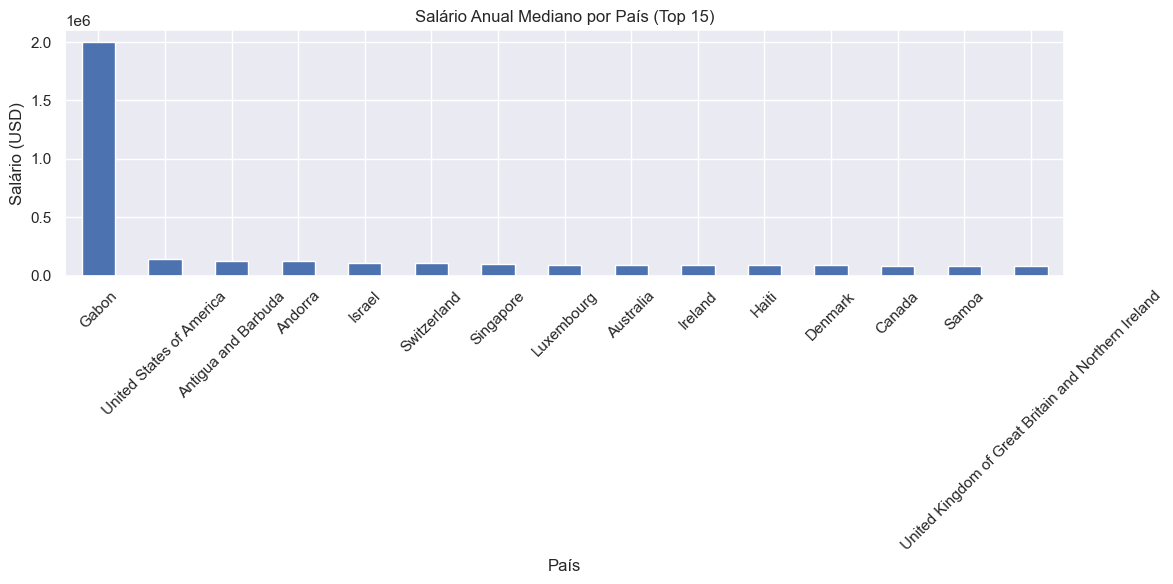

In [31]:
# Agrupamento por país e cálculo da mediana salarial
salario_pais = df_clean.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False).head(15)

# Gráfico
salario_pais.plot(kind='bar', figsize=(12, 6), title='Salário Anual Mediano por País (Top 15)')
plt.ylabel('Salário (USD)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

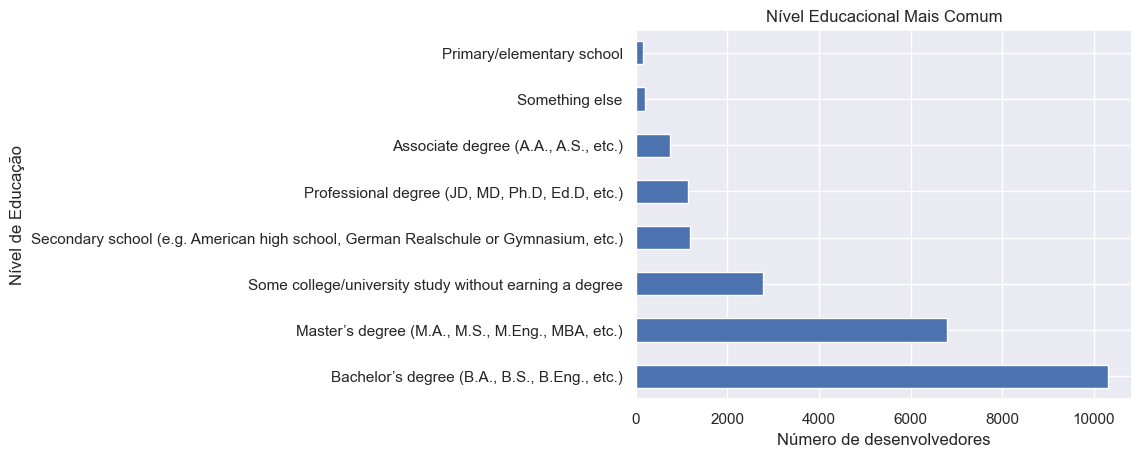

In [32]:
# Contagem dos níveis de educação
df_clean['EdLevel'].value_counts().head(10).plot(kind='barh', title='Nível Educacional Mais Comum')
plt.xlabel('Número de desenvolvedores')
plt.ylabel('Nível de Educação')
plt.show()

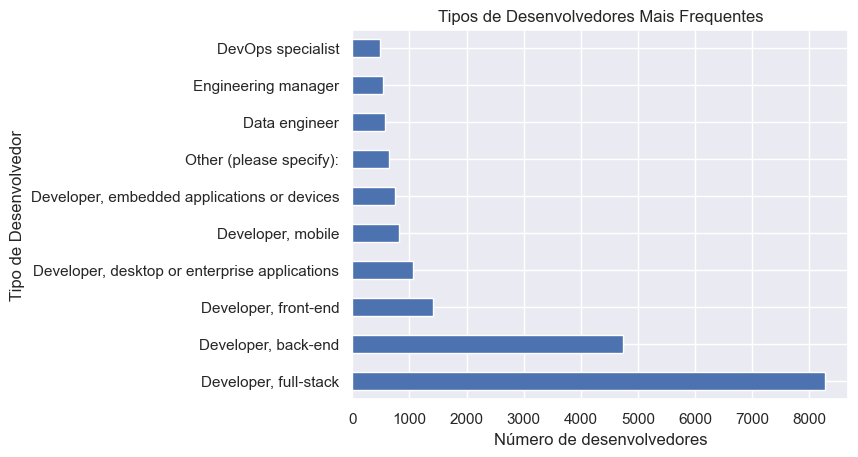

In [33]:
dev_types = df_clean['DevType'].dropna().str.split(';')
flat_types = [t.strip() for sublist in dev_types for t in sublist]
dev_counts = pd.Series(Counter(flat_types)).sort_values(ascending=False)

# Gráfico com os 10 principais tipos
dev_counts.head(10).plot(kind='barh', title='Tipos de Desenvolvedores Mais Frequentes')
plt.xlabel('Número de desenvolvedores')
plt.ylabel('Tipo de Desenvolvedor')
plt.show()

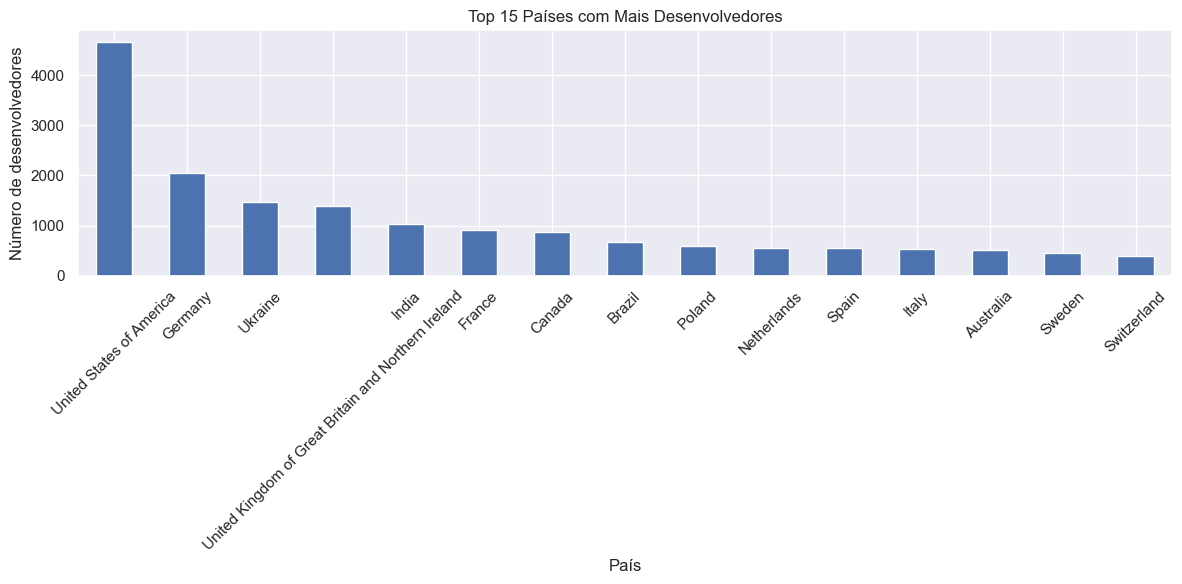

In [34]:
pais_counts = df_clean['Country'].value_counts().head(15)
pais_counts.plot(kind='bar', figsize=(12,6), title='Top 15 Países com Mais Desenvolvedores')
plt.ylabel('Número de desenvolvedores')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()